<a href="https://colab.research.google.com/github/Jojo18-20/AI_course_submission/blob/main/assignment2_module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johanna Schaefer Hand-in-Assignment 2



In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV


In [4]:
# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

In [5]:
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                          
          count unique                           top freq
Sentiment                                                
0          1008   1008           I8 is clear at 8 am    1
1          1079   1079  Express highway have traffic    1

In [6]:
# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


GridSearch

In [12]:

#vectorisers
vectorizers = {
    "Count": CountVectorizer(ngram_range=(1, 2), stop_words="english", min_df=20),
    "Tfidf": TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english'),
    "Hashing": HashingVectorizer(ngram_range=(1, 2), n_features=200)
}

#models

models = {
    "LogReg": (LogisticRegression(max_iter=1000, random_state=0),
               {"C": [0.01, 0.1, 1, 10,1000]}),

    "SVM": (SVC(probability=True, random_state=0),{"kernel": ["linear", "rbf", "poly"], "C": [0.1, 1, 10]}),

    "RandomForest": (RandomForestClassifier(random_state=0),
                     {"n_estimators": [100, 200,300], "max_depth": [None, 10, 20,30],"min_samples_split":[2,5,10],"min_samples_leaf": [1, 2, 4]}),

    "XGBoost": (XGBClassifier(eval_metric="logloss", random_state=0),
                {"learning_rate": [0.01, 0.1,0.2], "n_estimators": [100, 200,300], "max_depth": [3, 4,5]}),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}),
}


results = []

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(x_train)
    X_test_vec = vectorizer.transform(x_test)

    for model_name, (model, param_grid) in models.items():
        print(f"\n--- {vec_name} + {model_name} ---")

        search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-3, verbose=1)
        search.fit(X_train_vec, y_train)

        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)

        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test_vec)[:, 1]
            auc_score = roc_auc_score(y_test, y_prob)
        else:
            auc_score = None

        results.append({
            "Vectorizer": vec_name,
            "Model": model_name,
            "BestParams": search.best_params_,
            "Accuracy": acc,
            "AUC": auc_score
        })


df_results = pd.DataFrame(results)
print(df_results)



--- Count + LogReg ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits

--- Count + SVM ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Count + RandomForest ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Count + XGBoost ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Count + KNN ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

--- Tfidf + LogReg ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits

--- Tfidf + SVM ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits

--- Tfidf + RandomForest ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Tfidf + XGBoost ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Tfidf + KNN ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

--- Hashing + LogReg ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits

--- Hashing + SVM ---
Fitting 5 folds for each of 9 candidate

In [17]:

print(df_results)

{'Vectorizer': 'Count', 'Model': 'LogReg', 'BestParams': {'C': 10}, 'Accuracy': 0.9478672985781991, 'AUC': np.float64(0.9930513254371122)}
{'Vectorizer': 'Count', 'Model': 'SVM', 'BestParams': {'C': 1, 'kernel': 'rbf'}, 'Accuracy': 0.9597156398104265, 'AUC': np.float64(0.9955104342921601)}
{'Vectorizer': 'Count', 'Model': 'RandomForest', 'BestParams': {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}, 'Accuracy': 0.9715639810426541, 'AUC': np.float64(0.9970219966159053)}
{'Vectorizer': 'Count', 'Model': 'XGBoost', 'BestParams': {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}, 'Accuracy': 0.9597156398104265, 'AUC': np.float64(0.9958939650310208)}
{'Vectorizer': 'Count', 'Model': 'KNN', 'BestParams': {'n_neighbors': 9, 'weights': 'distance'}, 'Accuracy': 0.9502369668246445, 'AUC': np.float64(0.9839706711787931)}
{'Vectorizer': 'Tfidf', 'Model': 'LogReg', 'BestParams': {'C': 1}, 'Accuracy': 0.9620853080568721, 'AUC': np.float64(0.99544275

Random Search


--- Vectorizer: Count ---

--- Count + LogReg ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



--- Count + SVM ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



--- Count + RandomForest ---

--- Count + XGBoost ---

--- Count + KNN ---

--- Vectorizer: Tfidf ---

--- Tfidf + LogReg ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



--- Tfidf + SVM ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



--- Tfidf + RandomForest ---

--- Tfidf + XGBoost ---

--- Tfidf + KNN ---

--- Vectorizer: Hashing ---

--- Hashing + LogReg ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



--- Hashing + SVM ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



--- Hashing + RandomForest ---

--- Hashing + XGBoost ---

--- Hashing + KNN ---
   Vectorizer         Model  \
0       Count        LogReg   
1       Count           SVM   
2       Count  RandomForest   
3       Count       XGBoost   
4       Count           KNN   
5       Tfidf        LogReg   
6       Tfidf           SVM   
7       Tfidf  RandomForest   
8       Tfidf       XGBoost   
9       Tfidf           KNN   
10    Hashing        LogReg   
11    Hashing           SVM   
12    Hashing  RandomForest   
13    Hashing       XGBoost   
14    Hashing           KNN   

                                           BestParams  Accuracy       AUC  
0                                            {'C': 1}  0.937799  0.990144  
1                          {'kernel': 'rbf', 'C': 10}  0.956938  0.982474  
2   {'n_estimators': 200, 'min_samples_split': 10,...  0.964115  0.991620  
3   {'subsample': 0.8, 'n_estimators': 300, 'max_d...  0.959330  0.990819  
4    {'weights': 'uniform', 'p': 1, 'n_ne

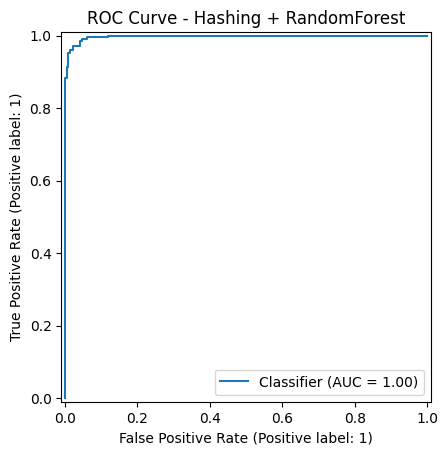

In [7]:
# Vectorizer dictionary
vectorizers = {
    "Count": CountVectorizer(ngram_range=(1,2), stop_words='english', min_df=20),
    "Tfidf": TfidfVectorizer(ngram_range=(1,1), stop_words='english', min_df=20, norm='l2'),
    "Hashing": HashingVectorizer(ngram_range=(1,2), n_features=200)
}

# Models + param grids
models = {
    "LogReg": (
        LogisticRegression(max_iter=1000, random_state=0),
        {"C": [0.01, 0.1, 1, 10, 1000]}
    ),
    "SVM": (
        SVC(probability=True, random_state=0),
        {"C": [0.01,0.1, 1, 10,100], "kernel": ["linear", "rbf", "poly"]}
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=0),
        {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20, 30],
         "min_samples_split": [2,5,10], "min_samples_leaf": [1,2,4]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric="logloss", random_state=0),
        {"learning_rate": [0.01, 0.1, 0.2,0.5], "n_estimators": [100,200,300,400], "max_depth": [3,4,5,6,7],"subsample": [0.6, 0.8, 1.0],
         "colsample_bytree": [0.6, 0.8, 1.0],
         "gamma": [0, 0.1, 0.2, 0.5]  }
    ),
    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3,5,7,9,11,13,15,17,19], "weights": ["uniform","distance"], "p":[1,2]}
    )
}

results_random = []

# Loop over vectorizers
for vec_name, vectorizer in vectorizers.items():
    print(f"\n--- Vectorizer: {vec_name} ---")
    X_train_vec = vectorizer.fit_transform(x_train)
    X_test_vec = vectorizer.transform(x_test)

    # Loop over models
    for model_name, (model, param_grid) in models.items():
        print(f"\n--- {vec_name} + {model_name} ---")
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=20,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            random_state=0
        )
        search.fit(X_train_vec, y_train)

        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)


        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test_vec)[:,1]
            auc = roc_auc_score(y_test, y_prob)
        else:
            auc = None

        results_random.append({
            "Vectorizer": vec_name,
            "Model": model_name,
            "BestParams": search.best_params_,
            "Accuracy": acc,
            "AUC": auc
        })

# Results dataframe
import pandas as pd
results_random_df = pd.DataFrame(results_random)
print(results_random_df)

best_idx = results_random_df['AUC'].idxmax()
best_entry = results_random_df.loc[best_idx]
best_vec = vectorizers[best_entry['Vectorizer']]
best_model = models[best_entry['Model']][0]
best_model.set_params(**best_entry['BestParams'])
X_train_vec = best_vec.fit_transform(x_train)
X_test_vec = best_vec.transform(x_test)
best_model.fit(X_train_vec, y_train)

if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test_vec)[:,1]
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"ROC Curve - {best_entry['Vectorizer']} + {best_entry['Model']}")
    plt.show()


In [19]:

df_results['SearchType'] = 'GridSearch'
results_random_df['SearchType'] = 'RandomSearch'


df_all = pd.concat([df_results, results_random_df], ignore_index=True)

df_all['BestParams_str'] = df_all['BestParams'].astype(str)


df_pivot = df_all.pivot_table(
    index=['Vectorizer', 'Model'],
    columns='SearchType',
    values=['Accuracy', 'AUC', 'BestParams_str'],
    aggfunc='first'
)


df_pivot.columns = [f'{metric}_{search}' for metric, search in df_pivot.columns]
df_pivot = df_pivot.reset_index()

print(df_pivot)
print(results_random_df["BestParams"])

   Vectorizer         Model  AUC_GridSearch  AUC_RandomSearch  \
0       Count           KNN        0.982096          0.985965   
1       Count        LogReg        0.990144          0.990144   
2       Count  RandomForest        0.991620          0.991620   
3       Count           SVM        0.982474          0.982474   
4       Count       XGBoost        0.991758          0.990819   
5     Hashing           KNN        0.985782          0.985427   
6     Hashing        LogReg        0.982806          0.982806   
7     Hashing  RandomForest        0.997207          0.997413   
8     Hashing           SVM        0.995352          0.995352   
9     Hashing       XGBoost        0.996268          0.995948   
10      Tfidf           KNN        0.963688          0.976452   
11      Tfidf        LogReg        0.986114          0.986114   
12      Tfidf  RandomForest        0.991838          0.991838   
13      Tfidf           SVM        0.978581          0.978581   
14      Tfidf       XGBoo

In [18]:
print(results_random)


[{'Vectorizer': 'Count', 'Model': 'LogReg', 'BestParams': {'C': 1}, 'Accuracy': 0.937799043062201, 'AUC': np.float64(0.9901435538155093)}, {'Vectorizer': 'Count', 'Model': 'SVM', 'BestParams': {'kernel': 'rbf', 'C': 10}, 'Accuracy': 0.9569377990430622, 'AUC': np.float64(0.9824736131144538)}, {'Vectorizer': 'Count', 'Model': 'RandomForest', 'BestParams': {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}, 'Accuracy': 0.9641148325358851, 'AUC': np.float64(0.9916203035922796)}, {'Vectorizer': 'Count', 'Model': 'XGBoost', 'BestParams': {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.6}, 'Accuracy': 0.9593301435406698, 'AUC': np.float64(0.9908189665041097)}, {'Vectorizer': 'Count', 'Model': 'KNN', 'BestParams': {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}, 'Accuracy': 0.9497607655502392, 'AUC': np.float64(0.9859651532843372)}, {'Vectorizer': 'Tfidf', 'Model': 'LogReg', 'BestParams': {